In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Datasets

## India 2014

### Agriculture

In [2]:
inAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/india_agriculture_2014.xls')

In [3]:
inAgri.head(1)

,id,country,submission_id,form_created,form_submitted,lat,lng,address,type,land_use,...,branded,infrastructure_type,infrastructure_specific,state,district,category,geom,gaul_2014_adm0,gaul_2014_adm1,gaul_2014_adm2
0,1539,India,1392014034076_Sunny,2/10/2014 11:58,2/10/2014 12:03,25.56872,84.67436,"Gola Road, ARA",Agro-dealers,Rural,...,Yes,Permanent shop,NaN,Bihar,Bhojpur,Arrah,0101000020E6100000C16ED8B6282B5540C49448A29791...,118.0,2434.0,33127.0


In [4]:
inAgri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 22 columns):
id                         65535 non-null int64
country                    65535 non-null object
submission_id              65535 non-null object
form_created               65535 non-null object
form_submitted             65535 non-null object
lat                        65535 non-null float64
lng                        65535 non-null float64
address                    65534 non-null object
type                       65535 non-null object
land_use                   65535 non-null object
name                       65528 non-null object
number_employees           54884 non-null float64
branded                    30469 non-null object
infrastructure_type        33097 non-null object
infrastructure_specific    210 non-null object
state                      65535 non-null object
district                   65535 non-null object
category                   65535 non-null object
geom     

** Agriculture types: **

In [5]:
inAgri['type'].value_counts()

Agro-dealers                                     30469
Processors/value addition points                 18801
Market Locations                                  5487
Government Vets                                   2891
Private sector Agricultural service providers     2628
Artificial Insemination Centres                   1947
Dairy Processors                                  1599
Day old chick hatcheries                           900
Farmer Organisations and Cooperatives              404
Dairy chilling plants                              314
National/Regional/State Research Stations           61
Warehouse/Storage/Aggregation Centres               34
Name: type, dtype: int64

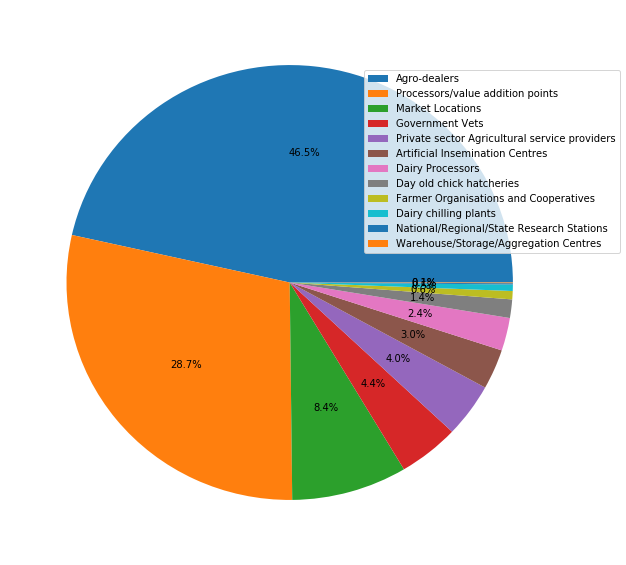

In [6]:
counts = inAgri['type'].value_counts()
labels = counts.index.tolist()
plt.figure(figsize=(10,10))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.1, 0.9));

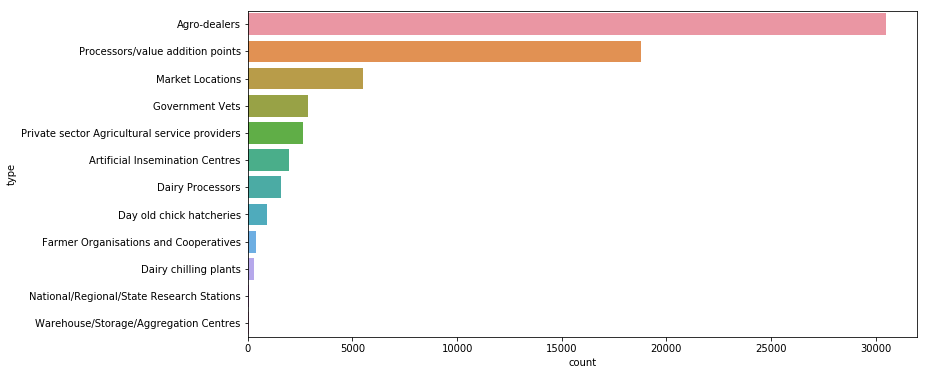

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(y='type',data=inAgri, order=labels);

** Land type: **

In [8]:
inAgri['land_use'].value_counts()

Rural    59608
Urban     5927
Name: land_use, dtype: int64

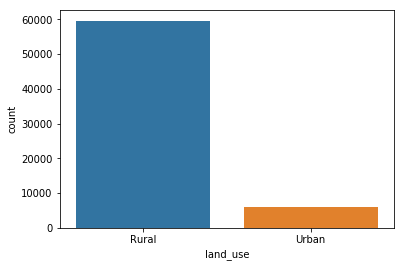

In [9]:
sns.countplot(x='land_use',data=inAgri);

** States: **

In [10]:
inAgri['state'].value_counts()

Uttar Pradesh    54907
Bihar            10628
Name: state, dtype: int64

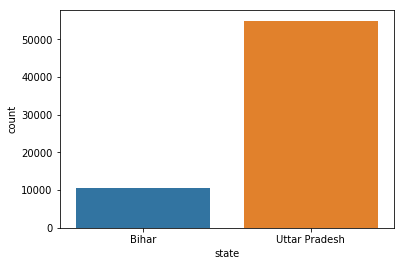

In [11]:
sns.countplot(x='state',data=inAgri);

In [12]:
inAgr_Bihar = inAgri[inAgri['state'] == 'Bihar']
inAgr_Uttar = inAgri[inAgri['state'] == 'Uttar Pradesh']

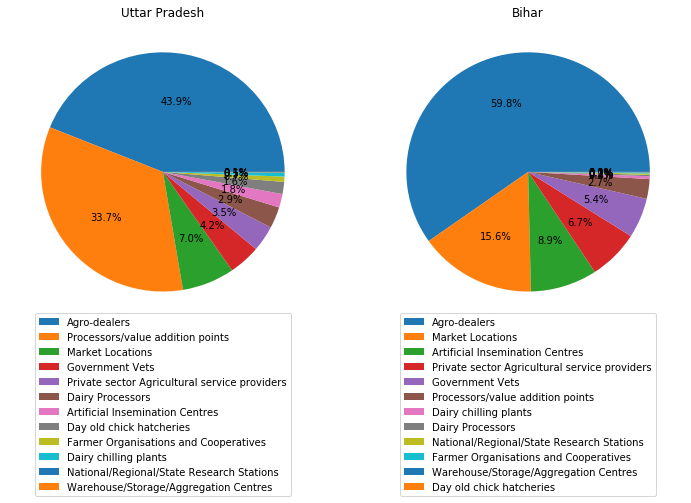

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,5.5))

counts = inAgr_Uttar['type'].value_counts()
labels = counts.index.tolist()
axes[0].pie(counts, autopct='%1.1f%%')
axes[0].set_title("Uttar Pradesh")
axes[0].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6))

counts = inAgr_Bihar['type'].value_counts()
labels = counts.index.tolist()
axes[1].pie(counts, autopct='%1.1f%%')
axes[1].set_title("Bihar")
axes[1].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6));

### Read and deal with maps

In [14]:
#Import libs
import geopandas as gpd
from iso3166 import countries

** Download India gadm36 shapefiles from [http://www.gadm.org/download](http://www.gadm.org/download) **

In [15]:
#After unzipping map for India, read in file
inmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_shp/gadm36_IND.shp')

In [16]:
inmap.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,,Union Territor,Union Territory,,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78..."
1,IND,India,IND.2_1,Andhra Pradesh,,,State,State,,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,,State,State,,IN.AR,"POLYGON ((94.21111298 27.61084175, 94.21350861..."
3,IND,India,IND.4_1,Assam,,,State,State,,IN.AS,"POLYGON ((89.83874512 25.96647453, 89.8381424 ..."
4,IND,India,IND.5_1,Bihar,,,State,State,,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2..."


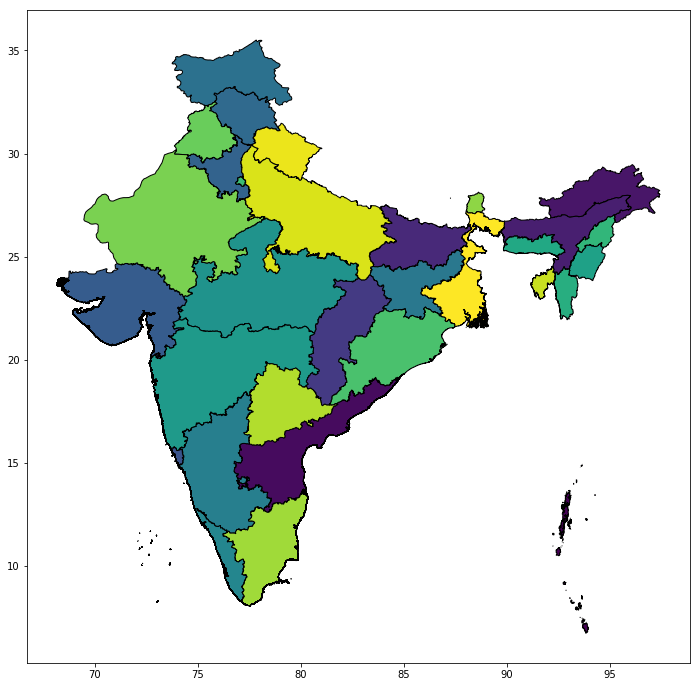

In [17]:
inmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

In [18]:
# Get Uttar Pradesh and Bihar states
inmap_state = inmap[(inmap['NAME_1'] == 'Uttar Pradesh') | (inmap['NAME_1'] == 'Bihar')]

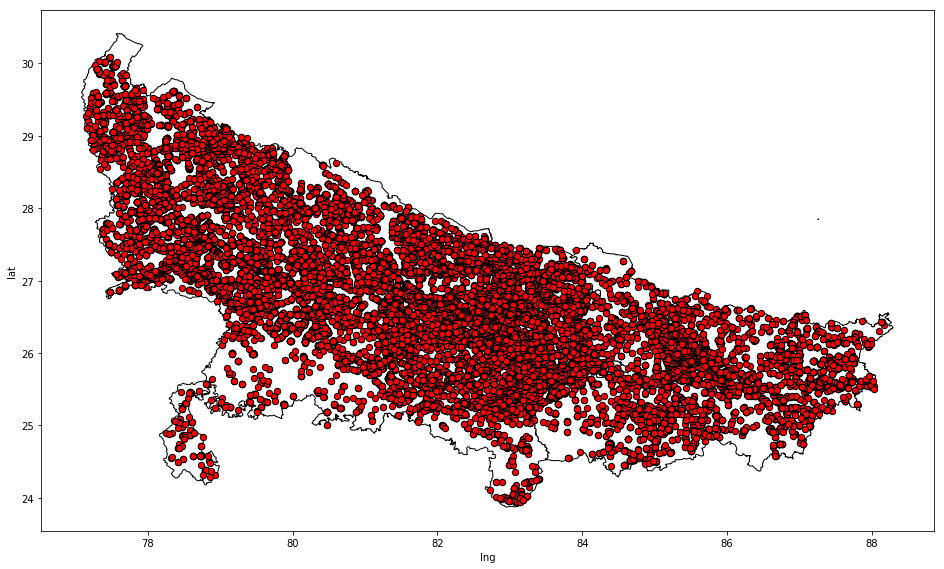

In [19]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Rectangular grid
Create a polygon grid using Geopandas

In [20]:
# Shapely for creating polygons
from shapely.geometry import Polygon 

In [21]:
def rectangular_grid(boundary, width, height):
    
    xmin = boundary.bounds.minx[0]
    xmax = boundary.bounds.maxx[0]
    ymin = boundary.bounds.miny[0]
    ymax = boundary.bounds.maxy[0]

    rows = int(np.ceil((ymax-ymin) /  height))
    cols = int(np.ceil((xmax-xmin) / width))

    XleftOrigin = xmin
    XrightOrigin = xmin + width
    YtopOrigin = ymax
    YbottomOrigin = ymax - height
    polygons = []

    for i in range(cols):
        Ytop = YtopOrigin
        Ybottom =YbottomOrigin
        for j in range(rows):
            polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
            Ytop = Ytop - height
            Ybottom = Ybottom - height
        XleftOrigin = XleftOrigin + width
        XrightOrigin = XrightOrigin + width
        
    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}
        
    return gpd.GeoDataFrame({'geometry':polygons}, crs=crs)

In [22]:
# The shapely.ops module has a cascaded_union that finds the cumulative union of many objects
from shapely.ops import cascaded_union

boundary = gpd.GeoSeries(cascaded_union(inmap_state['geometry']))

grid = rectangular_grid(boundary, 0.1, 0.1)

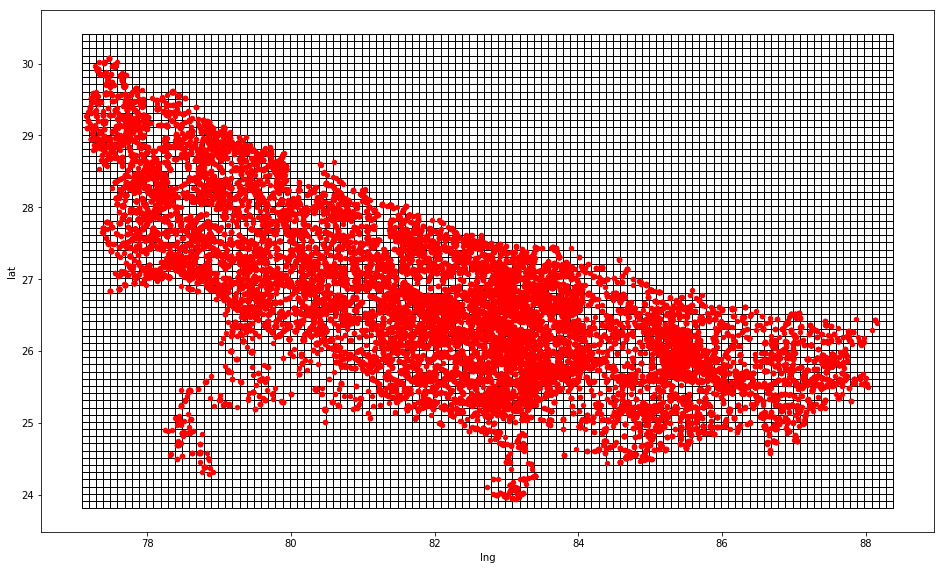

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')

grid.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r')

### Heat map
Convert latitude/longtitude columns to geometry column 

In [24]:
# Shapely for converting latitude/longtitude to geometry
from shapely.geometry import Point

In [25]:
def lng_lat_to_geo(lng, lat):
    # creating a geometry column 
    geometry = [Point(xy) for xy in zip(lng, lat)]

    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}

    # Creating a Geographic data frame 
    return gpd.GeoDataFrame(crs=crs, geometry=geometry)

In [26]:
lng = inAgri[inAgri['type'] == 'Agro-dealers']['lng']
lat = inAgri[inAgri['type'] == 'Agro-dealers']['lat']
points = lng_lat_to_geo(lng,lat)
points.head()

,geometry
0,POINT (84.67435999999999 25.56872)
1,POINT (81.23368000000001 26.22088)
2,POINT (81.17151 26.12233)
3,POINT (80.06865999999999 27.41452)
4,POINT (79.99354 27.40183)


In [27]:
grid.head()

,geometry
0,"POLYGON ((77.08490753 30.41245842, 77.18490752..."
1,"POLYGON ((77.08490753 30.31245842, 77.18490752..."
2,"POLYGON ((77.08490753 30.21245842, 77.18490752..."
3,"POLYGON ((77.08490753 30.11245842, 77.18490752..."
4,"POLYGON ((77.08490753 30.01245841999999, 77.18..."


In [28]:
def count_the_points(grid, points):
    g = grid.copy()
    p = points.copy()
    
    joined = gpd.tools.sjoin(g, p)
    joined.drop('index_right',axis=1,inplace=True)
    point_counts = joined.groupby(joined.index).agg('count')
    point_counts.rename(columns={"geometry": "count"}, inplace=True)
    
    grid = g.merge(point_counts, how='left', left_index=True, right_index=True)
    
    return grid

In [29]:
density = count_the_points(grid, points)
density.head()

,geometry,count
index_left,,
0,"POLYGON ((77.08490753 30.41245842, 77.18490752...",NaN
1,"POLYGON ((77.08490753 30.31245842, 77.18490752...",NaN
2,"POLYGON ((77.08490753 30.21245842, 77.18490752...",NaN
3,"POLYGON ((77.08490753 30.11245842, 77.18490752...",NaN
4,"POLYGON ((77.08490753 30.01245841999999, 77.18...",NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


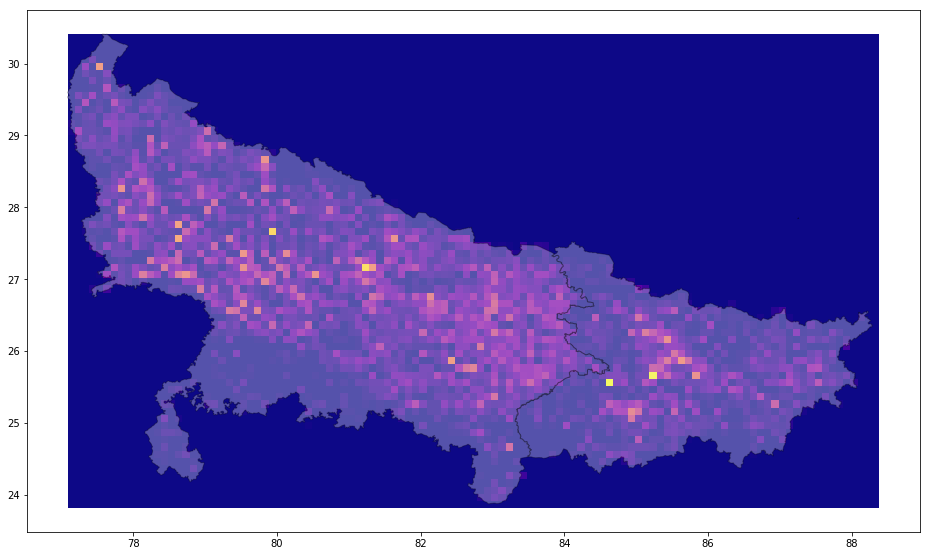

In [30]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)

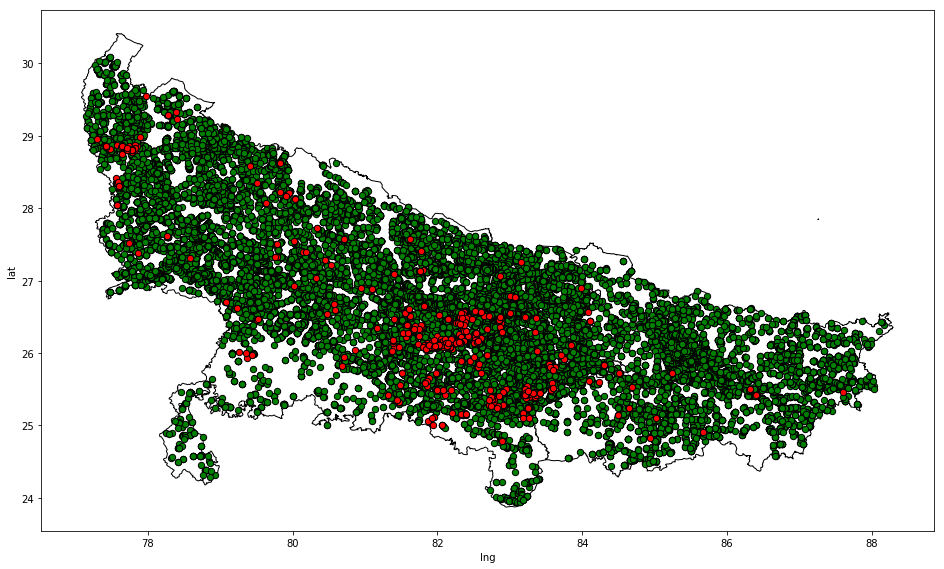

In [31]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='g', edgecolor='k', s=40)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


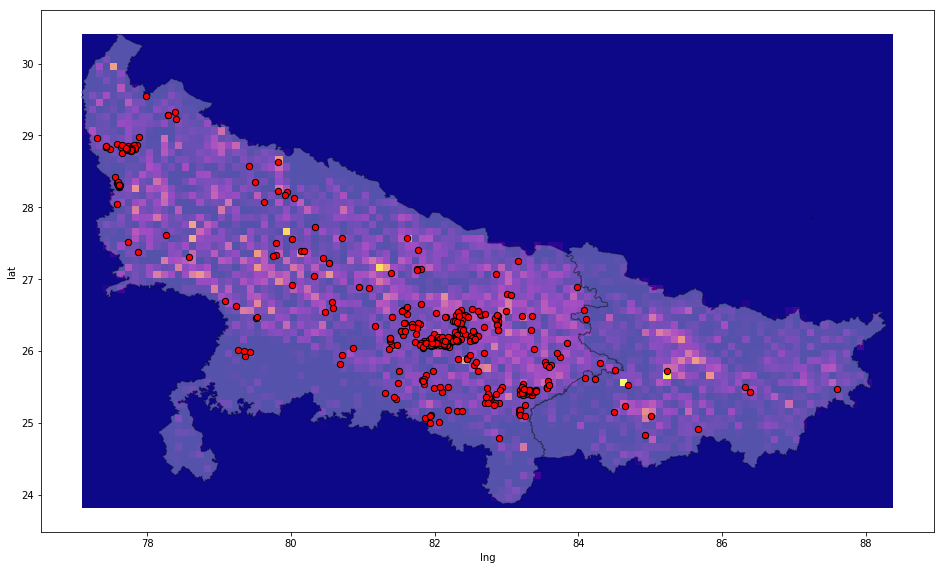

In [32]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

***
## Kenya 2015
### Agriculture

In [33]:
kenAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/kenya_agriculture_2015.xls')

In [34]:
kenAgri.head(1)

,submission_id,form_name,form_created,form_submitted,province,county,constituency,ward,lat,long,gps_accuracy,type,ag_dealer_name,ag_dealer_operational,ag_dealer_num_employees,ex_post_operational,ex_post_contact_num,ex_post_num_employees
0,1433841551991_Stellan,Agriculture,2015-06-09,2015-06-09,NYANZA,HOMA BAY,SUBA SOUTH,GWASSI SOUTH,-0.76614,34.07594,9,Farmer Organisations And Cooperatives,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
kenAgri['type'].unique()

array(['Farmer Organisations And Cooperatives', 'Agro-Dealers',
       'Extension Posts/Offices', 'Government And Private Vets',
       'Artificial Insemination Centres',
       'Seed Multipliers/Seed Companies',
       'Private Sector Agricultural Service Providers',
       'Warehouse/Storage/Aggregation Centres/Collection Centres',
       'Market Locations', 'Abattoirs/ Slaughter Houses', 'Cattle Dips',
       'Processors/Value Addition Points', 'Day Old Chick Hatcheries',
       'Dairy Chilling Plants', 'Fish Landing Sites', 'Dairy Processors',
       'Fish Hatcheries', 'National/Regional/State Research Stations',
       'Ranches'], dtype=object)

Download Kenia gadm36 shapefiles from http://www.gadm.org/download

In [36]:
#After unzipping map for Kenya, read in file
kenmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_shp/gadm36_KEN.shp')

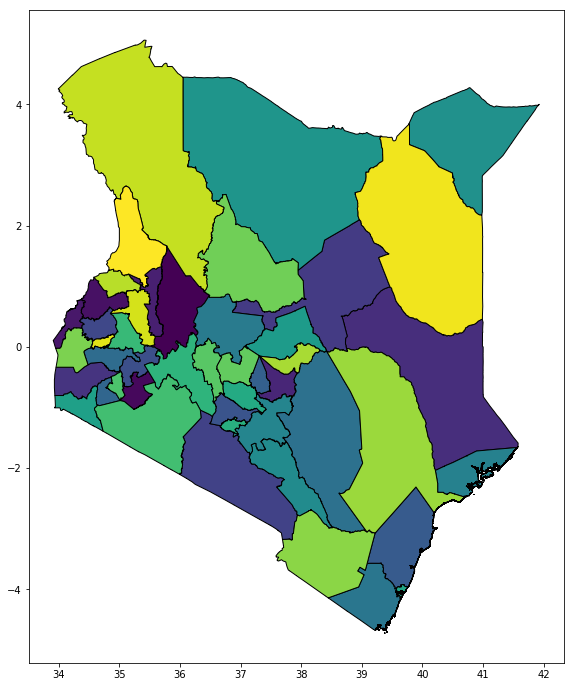

In [37]:
kenmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

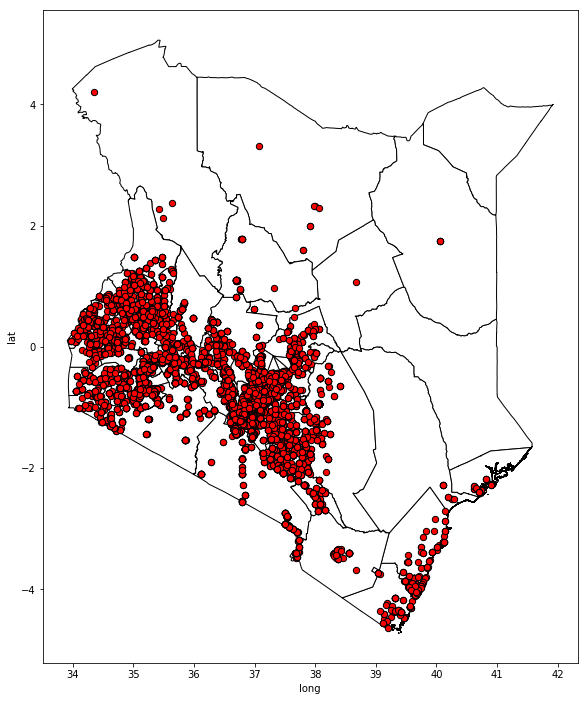

In [38]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Voronoi tessellation
Built a Voronoi tessellation from points

In [39]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import LineString
# The shapely.ops module has a polygonize that returns a generator for Shapely Polygon objects.
from shapely.ops import polygonize

In [40]:
def voronoi_tessellation(long,lat):
    points = np.zeros((long.shape[0],2))
    points[:,0] = long
    points[:,1] = lat
    
    vor = Voronoi(points)
    
    #build a collection of Shapely LineString objects
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
        if -1 not in line
    ]
    
    voronoid = []
    for poly in polygonize(lines):
        voronoid.append(poly)
    
    voronoid = gpd.GeoDataFrame(voronoid)
    voronoid.rename(columns={0: "geometry"}, inplace=True)
    
    return voronoid

In [41]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

voronoid = voronoi_tessellation(long, lat)

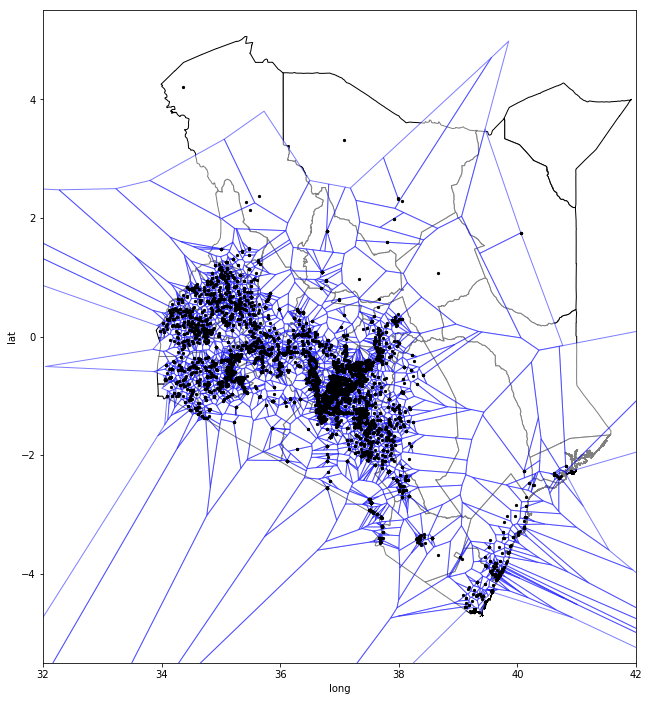

In [42]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
voronoid.plot(ax=ax, color='white', edgecolor='blue', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5);

### Voronoi tessellation finite_polygons

In [43]:
from scipy.spatial import Voronoi
from shapely.geometry import Polygon

Get the boundary of Kenya

In [44]:
# The shapely.ops module has a cascaded_union that finds the cumulative union of many objects
from shapely.ops import cascaded_union

In [45]:
boundary = gpd.GeoSeries(cascaded_union(kenmap['geometry']))
boundary = gpd.GeoDataFrame(boundary).rename(columns={0: 'geometry'})

In [46]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [47]:
def voronoi_tesellation_box(boundary,lng,lat):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    boundary : GeoDataFrame, 
        Geometry of the country.
    lng : GeoSeries, 
        Longitud values of points. 
    lat : GeoSeries, 
        Longitud values of points. 
    Returns
    -------
    voronoid : GeaoDataFrames
        Geometries of Voronoi regions.
    """
    # array with points coordinates
    points = np.zeros((lng.shape[0],2))
    points[:,0] = lng
    points[:,1] = lat

    # compute Voronoi tesselation
    vor = Voronoi(points)
    
    # Reconstruct infinite voronoi regions in a 2D diagram to finite regions.
    regions, vertices = voronoi_finite_polygons_2d(vor)
    
    # build box from country boundary
    xmin = boundary.bounds.minx[0]
    xmax = boundary.bounds.maxx[0]
    ymin = boundary.bounds.miny[0]
    ymax = boundary.bounds.maxy[0]

    box = Polygon([[xmin, ymin], [xmin, ymax], [xmax, ymax], [xmax, ymin]])

    voronoid = [] 
    for region in regions:
        polygon = vertices[region]
        # Clipping polygon
        poly = Polygon(polygon)
        voronoid.append(poly.intersection(box))
        
    voronoid = gpd.GeoDataFrame(geometry = voronoid)
    
    vor_lng = vor.points[:,0]
    vor_lat = vor.points[:,1]
    
    voronoid['lng'] = vor_lng
    voronoid['lat'] = vor_lat
    
    return voronoid 


In [48]:
lon = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

voronoid = voronoi_tesellation_box(boundary,lon,lat)

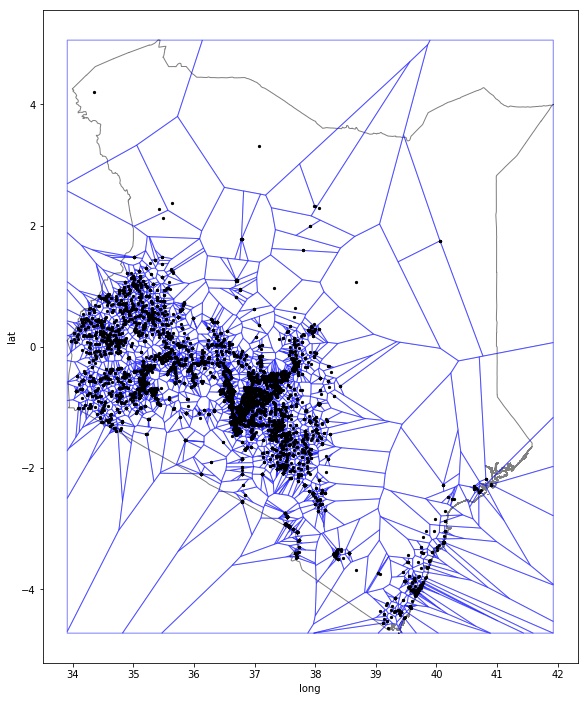

In [49]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

boundary.plot(ax=ax, color='white', edgecolor='black')
voronoid.plot(ax=ax, color='white', edgecolor='b', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

In [50]:
# Coordinate reference system : WGS84
boundary.crs = {'init': 'epsg:4326'}
voronoid.crs = {'init': 'epsg:4326'}

In [51]:
#Export as shp files
!mkdir ./data
boundary.to_file(driver = 'ESRI Shapefile', filename = './data/boundary.shp')
voronoid.to_file(driver = 'ESRI Shapefile', filename = './data/voronoid.shp')
outlayer  = './data/voronoid_test.shp'

mkdir: ./data: File exists


Intersect with the country boundary

In [52]:
# We are going to import shapely fiona and rtree in order to win efficiency to manage the size of the data.
import fiona
import rtree
from shapely.geometry import mapping, shape

In [53]:
with fiona.open('./data/boundary.shp', 'r') as layer1:
    with fiona.open('./data/voronoid.shp', 'r') as layer2:
        # We copy schema and add the  new property for the new resulting shp
        crss=layer2.crs
        schema = layer2.schema.copy()
        schema['properties']['basinid'] = 'int:10'
        # We open a first empty shp to write new content from both others shp
        with fiona.open(outlayer, 'w', 'ESRI Shapefile', schema, crs=crss) as layer3:
            index = rtree.index.Index()
            for feat1 in layer1:
                fid = int(feat1['id'])
                geom1 = shape(feat1['geometry'])
                index.insert(fid, geom1.bounds)

            for feat2 in layer2:
                geom2 = shape(feat2['geometry'])
                for fid in list(index.intersection(geom2.bounds)):
                    if fid != int(feat2['id']):
                        feat1 = layer1[fid]
                        geom1 = shape(feat1['geometry'])
                        if geom1.intersects(geom2):
                            # We take attributes from waterRiskLayer
                            props = feat2['properties']
                            # Then append the uid attribute we want from the other shp
                            props['basinid'] = schema['properties']['basinid']
                            # Add the content to the right schema in the new shp
                            layer3.write({
                                'properties': props,
                                'geometry': mapping(geom1.intersection(geom2))
                            });

In [54]:
def spatial_overlays(df1, df2, how='intersection'):
    '''Compute overlay intersection of two 
        GeoPandasDataFrames df1 and df2
    '''
    df1 = df1.copy()
    df2 = df2.copy()
    df1['geometry'] = df1.geometry.buffer(0)
    df2['geometry'] = df2.geometry.buffer(0)
    if how=='intersection':
        # Spatial Index to create intersections
        spatial_index = df2.sindex
        df1['bbox'] = df1.geometry.apply(lambda x: x.bounds)
        df1['histreg']=df1.bbox.apply(lambda x:list(spatial_index.intersection(x)))
        pairs = df1['histreg'].to_dict()
        nei = []
        for i,j in pairs.items():
            for k in j:
                nei.append([i,k])
        
        pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
        pairs = pairs.merge(df1, left_on='idx1', right_index=True)
        pairs = pairs.merge(df2, left_on='idx2', right_index=True, suffixes=['_1','_2'])
        pairs['Intersection'] = pairs.apply(lambda x: (x['geometry_1'].intersection(x['geometry_2'])).buffer(0), axis=1)
        pairs = gpd.GeoDataFrame(pairs, columns=pairs.columns, crs=df1.crs)
        cols = pairs.columns.tolist()
        cols.remove('geometry_1')
        cols.remove('geometry_2')
        cols.remove('histreg')
        cols.remove('bbox')
        cols.remove('Intersection')
        dfinter = pairs[cols+['Intersection']].copy()
        dfinter.rename(columns={'Intersection':'geometry'}, inplace=True)
        dfinter = gpd.GeoDataFrame(dfinter, columns=dfinter.columns, crs=pairs.crs)
        dfinter = dfinter.loc[dfinter.geometry.is_empty==False]
        return dfinter
    elif how=='difference':
        spatial_index = df2.sindex
        df1['bbox'] = df1.geometry.apply(lambda x: x.bounds)
        df1['histreg']=df1.bbox.apply(lambda x:list(spatial_index.intersection(x)))
        df1['new_g'] = df1.apply(lambda x: reduce(lambda x, y: x.difference(y).buffer(0), [x.geometry]+list(df2.iloc[x.histreg].geometry)) , axis=1)
        df1.geometry = df1.new_g
        df1 = df1.loc[df1.geometry.is_empty==False].copy()
        df1.drop(['bbox', 'histreg', new_g], axis=1, inplace=True)
        return df1

In [55]:
voronoid = spatial_overlays(voronoid, boundary, how='intersection')

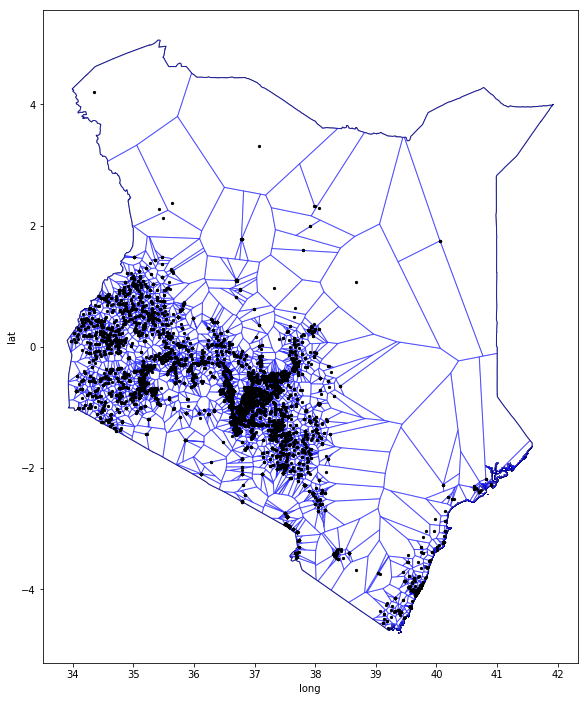

In [56]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

boundary.plot(ax=ax, color='white', edgecolor='black')
voronoid.plot(ax=ax, color='white', edgecolor='b', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

### Nearest neighbour distance map

In [57]:
from scipy.spatial import cKDTree

In [58]:
def distances_map_cKDTree(boundary, pixel_size, points):
    
    xmin = int(np.floor(boundary.bounds.minx[0]))
    xmax = int(np.ceil(boundary.bounds.maxx[0]))
    ymin = int(np.floor(boundary.bounds.miny[0]))
    ymax = int(np.ceil(boundary.bounds.maxy[0]))
    
    x = np.linspace(xmin, xmax, int((xmax-xmin)/pixel_size)+1)
    y = np.linspace(ymin, ymax, int((ymax-ymin)/pixel_size)+1)
    
    tree = cKDTree(points)
    
    image = np.zeros((len(y),len(x)))
    
    for i in range(len(x)):
        for j in range(len(y)):
            image[j,i] = tree.query([x[i],y[j]])[0]
    return image

In [59]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

points = np.zeros((long.shape[0],2))
points[:,0] = long
points[:,1] = lat

In [60]:
image = distances_map_cKDTree(boundary, 0.1, points)

In [61]:
#image = distances_map(boundary, 0.1, points)

xmin = int(np.floor(boundary.bounds.minx[0]))
xmax = int(np.ceil(boundary.bounds.maxx[0]))
ymin = int(np.floor(boundary.bounds.miny[0]))
ymax = int(np.ceil(boundary.bounds.maxy[0]))

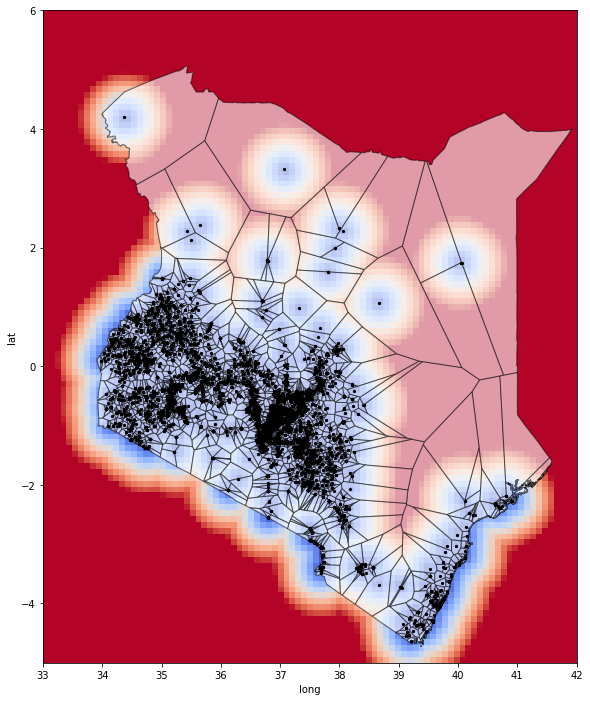

In [62]:
fig, ax = plt.subplots(figsize=[12,12])

ax.imshow(image, origin = 'lower', extent=[xmin,xmax,ymin,ymax], vmax=0.8, cmap='coolwarm')
boundary.plot(ax=ax, color='white', edgecolor='black', alpha=0.2)
voronoid.plot(ax=ax, color='white', edgecolor='k', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

#ax.set_xlim(35,40)
#ax.set_ylim(-2,2);

### Saving raster data
We use raterio to save the grid as a GeoTIFF file

In [63]:
import rasterio

To save the coordinates we use the `from_origin` function in the `rasterio.transform` module.

Note, in the from_origin() method, west should be a value from -180 to 180 (not 0-360).

In [64]:
pixel_size = 0.1
west = int(np.floor(boundary.bounds.minx[0])) - pixel_size/2
north = int(np.ceil(boundary.bounds.maxy[0])) - pixel_size/2

trans = rasterio.transform.from_origin(west, north, pixel_size, pixel_size)
trans

Affine(0.1, 0.0, 32.95,
       0.0, -0.1, 5.95)

To save the array along with georeferencing information to a new raster data file, call `rasterio.open()` with a path to the new file to be created, `'w'` to specify writing mode, and several keyword arguments.

In [65]:
dataset = rasterio.open('dataset.tif', 'w', driver='GTiff',
                        height=image.shape[0], width=image.shape[1],
                        count=1, dtype='float64',
                        crs='EPSG:4326', transform=trans)

Reverse the order of elements along the y-axis

In [66]:
image = np.flip(image,axis=0)

To save the grid, call the new dataset’s `write()` method with the grid and target band number as arguments.

In [67]:
dataset.write(image, 1)

and then call the `close()` method to sync data to disk and finish.

In [68]:
dataset.close()

In [69]:
with rasterio.open('dataset.tif') as dataset:
    myData=dataset.read(1)
    profile=dataset.crs
    print(dataset.bounds)
    print(dataset.width)
    print(dataset.height)

BoundingBox(left=32.95, bottom=-5.150000000000001, right=42.050000000000004, top=5.95)
91
111


### Zonal statistics

In [70]:
from rasterstats import zonal_stats

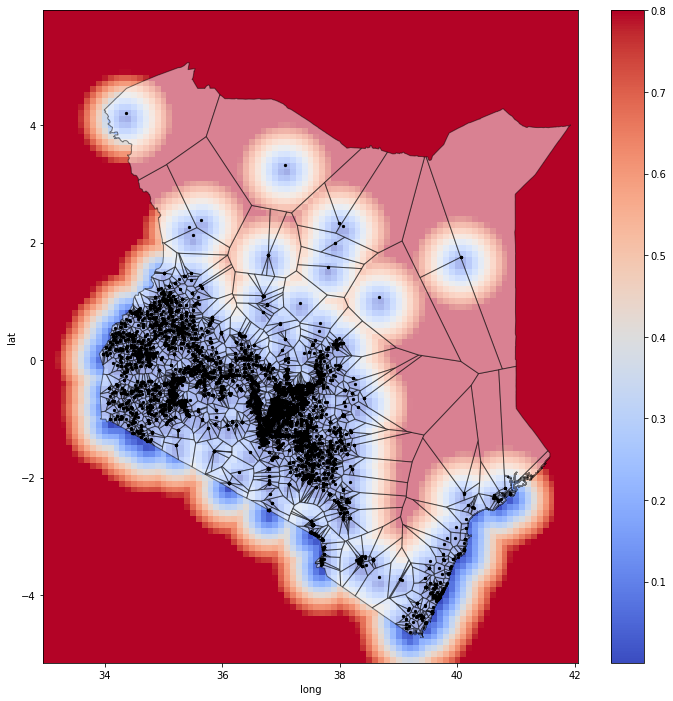

In [71]:
fig, ax = plt.subplots(figsize=[12,12])

im = ax.imshow(myData, extent=[dataset.bounds[0],dataset.bounds[2],dataset.bounds[1],dataset.bounds[3]], vmax=0.8, cmap='coolwarm')
#boundary.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
voronoid.plot(ax=ax, color='white', edgecolor='k', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

#ax.set_xlim(38,42)
#ax.set_ylim(-5,-2)
fig.colorbar(im, ax=ax)

In [72]:
zs = zonal_stats(voronoid, 'dataset.tif',  all_touched=True)

/anaconda3/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda3/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda3/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda3/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.array.dtype, float)


In [73]:
zs = gpd.GeoDataFrame(zs)

In [74]:
voronoid_zs = voronoid.join(zs)

In [75]:
voronoid_zs.head()

,idx1,idx2,lng,lat,geometry,count,max,mean,min
0,0,0,35.79564,0.63051,"POLYGON ((35.79575322888283 0.630946144414171,...",1,0.024504,0.024504,0.024504
1,1,0,36.22880,0.30882,POLYGON ((36.23234707920793 0.3053666831682995...,3,0.095033,0.047718,0.023225
2,2,0,35.15044,-0.71139,"POLYGON ((35.1328272386166 -0.698974952117922,...",2,0.019446,0.012205,0.004964
3,3,0,35.34248,-0.78052,POLYGON ((35.34225519801981 -0.780623910891089...,1,0.005531,0.005531,0.005531
4,4,0,35.38232,-0.69001,"POLYGON ((35.38224500000001 -0.689935, 35.3827...",1,0.082311,0.082311,0.082311


In [76]:
voronoid_zs.to_file(driver='ESRI Shapefile',filename='voronoid.shp')

In [77]:
import matplotlib as mpl
import matplotlib.cm as cm

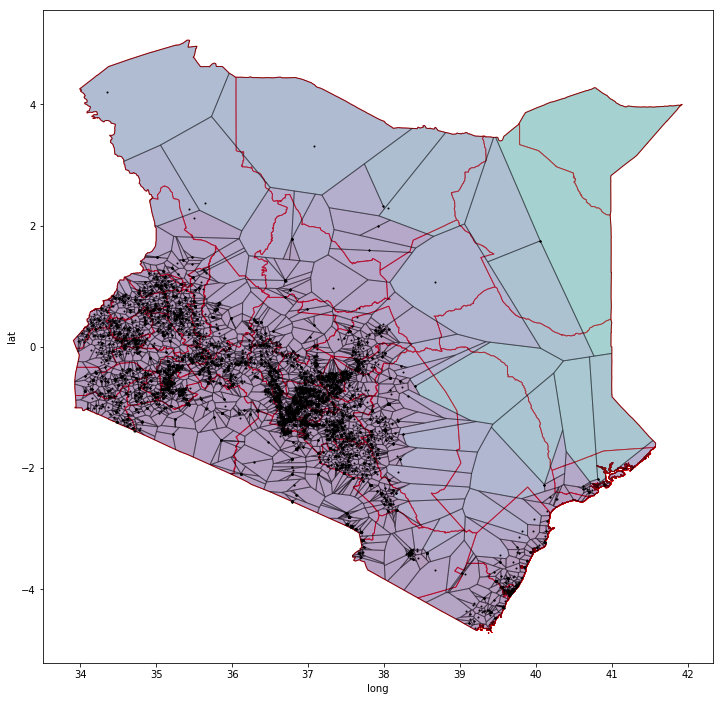

In [79]:
# find min/max values for normalization
minima = voronoid_zs['max'].min()
maxima = voronoid_zs['max'].max()

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

fig, ax = plt.subplots(figsize=[12,12])

kenmap.plot(ax=ax, color='white', edgecolor='r')

for i in range(len(voronoid_zs)):
    if (np.isnan(voronoid_zs['count'].iloc[i]) == False):
        polygon = voronoid_zs['geometry'].iloc[i]
        if voronoid_zs.geometry.iloc[i].type == 'Polygon':
            x, y = polygon.exterior.coords.xy
            ax.fill(x, y, facecolor=mapper.to_rgba(voronoid_zs['mean'].iloc[i]), edgecolor='k', zorder=1, alpha=0.4)
        else:
            point = Point(voronoid_zs.lng.iloc[i],voronoid_zs.lat.iloc[i])
            for j in range(len(list(voronoid_zs.geometry.iloc[i]))):
                polygon = list(voronoid_zs.geometry.iloc[i])[j]
                x, y = polygon.exterior.coords.xy
                ax.fill(x, y, facecolor=mapper.to_rgba(voronoid_zs['mean'].iloc[i]), edgecolor='k', zorder=1, alpha=0.4)
    
#voronoid.plot(ax=ax, color='white', edgecolor=0.5, alpha=0.5, zorder=2)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=1, zorder=2)

***
## Kenya use case

### Use case:
In Kenya, mobile network operators are partnering with banks to create digital financial services delivered through mobile money agents, who have a greater reach and geographical coverage than the banks.

Kenya is a global leader when it comes to mobile money services. In 2007, the telecom operator Safaricom launched its mobile money service M-Pesa as a simple way to text small payments between users. A decade later, the platform enables almost 30 million people to pay for crucial services, access loans, and send money all over the world. M-Pesa has become the world’s most successful mobile money service.

M-PESA is an electronic wallet service that lets an account holder store, send and receive money on their mobile phone. People can also use M-PESA to transfer cash or buy products and services in stores.
Once there is money in a user’s M-PESA account, the cash can be withdrawn by visiting an agent (typically in a corner shop) or transferred to others using a menu on their phone.
That makes it a quick, safe and simple way to make payments and handle money, saving people time and allowing them to focus on other things rather than making trips to the bank.

Tobias Okusimba runs his mobile money agency business offering M-Pesa and Airtel money services. He also vends consumer durables. He has been an agent for the past two years, open 12 hours a day, six days a week. His primary motivation to start the agent business was to earn transaction commissions.
 
With a transactional value of nearly Kshs 40,000 per day he has to convert cash to e-float daily. This means walking a kilometer to the nearest bank. He fears insecurity during transit to the bank and running out of e-float during business hours.

More info.:
https://medium.com/dfs-lab/pioneering-ai-for-mobile-money-agents-ecb913c88f3


### What they want:

They want to have a bank close from as many mobile money agents as possible.

### Which context layers:

** Accessibility to Cities **

![title](pics/Accessibility_to_Cities.png)

** Roads **

![title](pics/Roads.png)

** Roadless Areas **

![title](pics/Roadless_Areas.png)

** Urban Built-Up Areas **

![title](pics/Urban_Built-Up_Area.png)

### Analysis & report (vis):

In [ ]:
# Read data
kenFinance = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Finance/Kenya_finance_2015.xls')

In [ ]:
kenFinance['type'].unique()

** Scatter plot **

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', s=20, alpha=0.1)
kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='b', s=20, alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', s=20, alpha=0.5)
kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='b', s=20, alpha=0.5)

ax.set_xlim(34,35)
ax.set_ylim(-0.5,0.5)

** Heat map ** 

In [ ]:
# Grid
grid = rectangular_grid(boundary, 0.1, 0.1)

# Points
lon = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['long']
lat = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['lat']
points = lng_lat_to_geo(lon,lat)

# Density
density = count_the_points(grid, points)

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='PuRd', vmax=500)
kenmap.plot(ax=ax, color='white', edgecolor='black',alpha=0.3)
#kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', s=5, alpha=0.5)

In [ ]:
# Grid
grid = rectangular_grid(boundary, 0.05, 0.05)
# Density
density = count_the_points(grid, points)

fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='PuRd', vmax=100)
kenmap.plot(ax=ax, color='white', edgecolor='black',alpha=0.3)
kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='b', s=20, alpha=0.5)
ax.set_xlim(34,35)
ax.set_ylim(-0.5,0.5)

** Voronoi tessellation ** 

In [ ]:
lon = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['long']
lat = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['lat']

voronoid = voronoi_tesellation_box(boundary,lon,lat)
#voronoid = gpd.overlay(voronoid, boundary, how='intersection')

In [ ]:
points = np.zeros((lon.shape[0],2))
points[:,0] = lon
points[:,1] = lat

In [ ]:
image = distances_map_cKDTree(boundary, 0.1, points)

In [ ]:
pixel_size = 0.1
west = int(np.floor(boundary.bounds.minx[0])) - pixel_size/2
north = int(np.ceil(boundary.bounds.maxy[0])) - pixel_size/2

trans = rasterio.transform.from_origin(west, north, pixel_size, pixel_size)

dataset = rasterio.open('dataset.tif', 'w', driver='GTiff',
                        height=image.shape[0], width=image.shape[1],
                        count=1, dtype='float64',
                        crs='EPSG:4326', transform=trans)

dataset.write(image, 1)

dataset.close()

with rasterio.open('dataset.tif') as dataset:
    myData=dataset.read(1)

zs = zonal_stats(voronoid, 'dataset.tif',  all_touched=True)

zs = gpd.GeoDataFrame(zs)

voronoid_zs = voronoid.join(zs)

In [ ]:
# find min/max values for normalization
minima = voronoid_zs['max'].min()
maxima = voronoid_zs['max'].max()

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

fig, ax = plt.subplots(figsize=[12,12])

kenmap.plot(ax=ax, color='white', edgecolor='r')

for i in range(len(voronoid_zs)):
    polygon = voronoid_zs['geometry'].iloc[i]
    x, y = polygon.exterior.coords.xy
    ax.fill(x, y, facecolor=mapper.to_rgba(voronoid_zs['max'].iloc[i]), edgecolor='k', zorder=1, alpha=0.4)

kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=1, zorder=2)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5);

** Distance **

In [ ]:
lon = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['long']
lat = kenFinance[kenFinance['type'] == 'Mobile Money Agent']['lat']

points = np.zeros((lon.shape[0],2))
points[:,0] = lon
points[:,1] = lat

In [ ]:
image = distances_map_cKDTree(boundary, 0.1, points)

In [ ]:
pixel_size = 0.1
west = int(np.floor(boundary.bounds.minx[0])) - pixel_size/2
north = int(np.ceil(boundary.bounds.maxy[0])) - pixel_size/2

trans = rasterio.transform.from_origin(west, north, pixel_size, pixel_size)

dataset = rasterio.open('dataset.tif', 'w', driver='GTiff',
                        height=image.shape[0], width=image.shape[1],
                        count=1, dtype='float64',
                        crs='EPSG:4326', transform=trans)

image = np.flip(image,axis=0)

dataset.write(image, 1)

dataset.close()

with rasterio.open('dataset.tif') as dataset:
    myData=dataset.read(1)

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])

im = ax.imshow(myData, extent=[dataset.bounds[0],dataset.bounds[2],dataset.bounds[1],dataset.bounds[3]], vmax=0.8, cmap='coolwarm')
boundary.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5, alpha=0.5)

#ax.set_xlim(38,42)
#ax.set_ylim(-5,-2)
fig.colorbar(im, ax=ax)

In [ ]:
# Points
lon = kenFinance[kenFinance['type'] == 'Bank Agent']['long']
lat = kenFinance[kenFinance['type'] == 'Bank Agent']['lat']
points = lng_lat_to_geo(lon,lat)

In [ ]:
from rasterstats import point_query

In [ ]:
distance = []
for i in range(len(points)):
    point = points.iloc[i]
    distance.append(point_query(point, 'dataset.tif')[0])

In [ ]:
d = gpd.GeoDataFrame(data={'distance': distance})

In [ ]:
points_dis = points.join(d)

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter',
                                                    s=points_dis['distance']*10000, c=points_dis['distance']*10000, 
                                                    cmap="jet", colorbar=False, alpha=0.4, label="Distance")

kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=1, alpha=0.5)
kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', s=1, alpha=0.5)

plt.ylabel("Latitude")
plt.xlabel("Longitude")

plt.legend(fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter',
                                                    s=points_dis['distance']*100000, c=points_dis['distance']*100000, 
                                                    cmap="jet", colorbar=False, alpha=0.4, label="Distance")

kenFinance[kenFinance['type'] == 'Bank Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=10, alpha=0.5)
kenFinance[kenFinance['type'] == 'Mobile Money Agent'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', s=10, alpha=0.5)

plt.ylabel("Latitude")
plt.xlabel("Longitude")

plt.legend(fontsize=20, loc=1)

ax.set_xlim(36.2,38.2)
ax.set_ylim(1.5,3);

### Country info:

Mobile money agents represented 94.8% of mobile money’s physical cash-in and cash-out global footprint whereas ATMs represent just 4.2% and bank branches represent 1.0%.

Kenya - Key Highlights ([source](http://finclusionlab.org/market-insights/kenya))
- 25% of all access points are concentrated in Nairobi, making it the main hub for financial services in Kenya.
- 78% of all access points in Kenya are mobile money agents.
- Commercial banks have at least one access point in each of the 71 counties.
- Nairobi has the highest number (70) of access points per 10,000 adults (18+ years) among all provinces in Kenya.

### Analysis & report (inf):

** Concentration of similar services **

In [ ]:
kenFinance['type'].value_counts()[0:2]

In [ ]:
counts = kenFinance['type'].value_counts()[0:2]
labels = counts.index.tolist()
plt.figure(figsize=(5,5))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.1, 0.9));

In [ ]:
kenFinance.columns

In [ ]:
kenFinance['county'].unique()